**Breast Cancer Prediction**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:


%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
column_names = ['ID', 'diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'SE Radius', 'SE Texture', 'SE Perimeter', 'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry', 'SE Fractal Dimension',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension'
]

# Load CSV into DataFrame
df = pd.read_csv('wdbc_data.csv', names=column_names, header=None)  # assuming no header in the CSV

# Display the first few rows of the dataframe
print(df.head())

         ID diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst Radius  Worst Texture  Worst Perimeter  Worst Ar

**Data Processing**

In [4]:
# Distribution of the target variable 'diagnosis'
diagnosis_distribution = df['diagnosis'].value_counts(normalize=True)
diagnosis_distribution


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

**The distribution of benign and malignant show us dataset is not imbalanced, which is good to go to predictive model step**

**As the provided description, we do not need to check the missing value for this case**

In [4]:
df = df.drop('ID', axis=1)

In [37]:
feature_summary = df.describe()
feature_summary

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [271]:
df['diagnosis'] = np.where(df['diagnosis'] == 'B', 0, 1)
unique_values = df['diagnosis'].unique()

print(unique_values)


[1 0]


In [19]:
df = df.astype(float)
correlations = df.corr()['diagnosis'].drop('diagnosis')
correlations

Mean Radius                0.730029
Mean Texture               0.415185
Mean Perimeter             0.742636
Mean Area                  0.708984
Mean Smoothness            0.358560
Mean Compactness           0.596534
Mean Concavity             0.696360
Mean Concave Points        0.776614
Mean Symmetry              0.330499
Mean Fractal Dimension    -0.012838
SE Radius                  0.567134
SE Texture                -0.008303
SE Perimeter               0.556141
SE Area                    0.548236
SE Smoothness             -0.067016
SE Compactness             0.292999
SE Concavity               0.253730
SE Concave Points          0.408042
SE Symmetry               -0.006522
SE Fractal Dimension       0.077972
Worst Radius               0.776454
Worst Texture              0.456903
Worst Perimeter            0.782914
Worst Area                 0.733825
Worst Smoothness           0.421465
Worst Compactness          0.590998
Worst Concavity            0.659610
Worst Concave Points       0

In [50]:
!pip install --upgrade numpy

  Using cached https://files.pythonhosted.org/packages/32/dd/43d8b2b2ebf424f6555271a4c9f5b50dc3cc0aafa66c72b4d36863f71358/numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


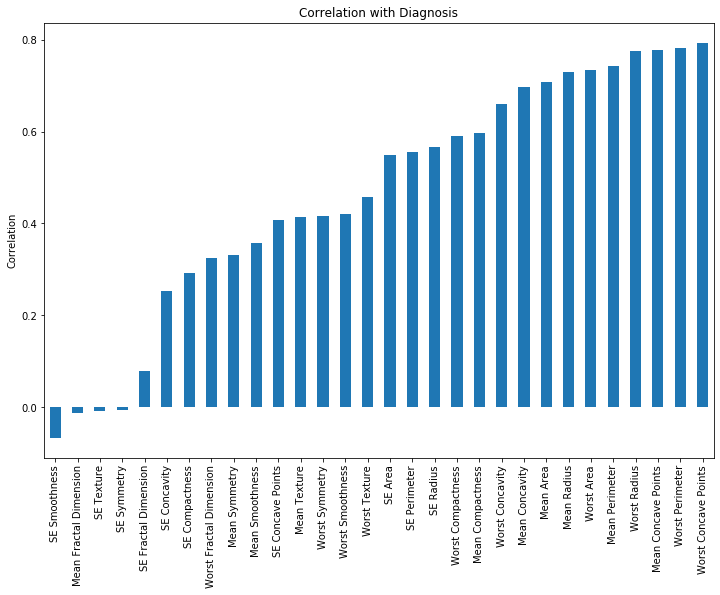

In [20]:
# Plot
plt.figure(figsize=(12, 8))
correlations.sort_values().plot(kind='bar')
plt.title('Correlation with Diagnosis')
plt.ylabel('Correlation')
plt.show()

**Usually use this correlation for the variable selection however, in this scenario, I would like to try all the given features.**

In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


### Decision Tree

In [7]:
# Split the data into training (60%), validation (20%), and test (20%) datasets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=14)  # 0.25 x 0.8 = 0.2



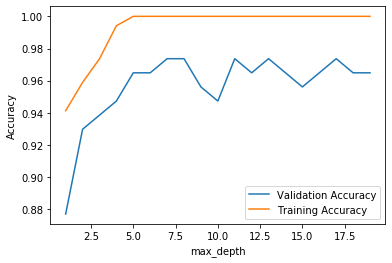

In [19]:
# I will try maximum depths from 1 to 20
complexity_values = range(1,20)

# I create an empty list to hold my accuracies
train_accuracies = []
val_accuracies=[]


for complexity_value in complexity_values:

    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value)
    val_accuracies.append(clf.fit(X_train, y_train).score(X_val, y_val))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    

line1, =plt.plot(complexity_values, val_accuracies,label='val_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('Validation Accuracy', 'Training Accuracy'))
plt.show()


**As noticed that max_depth = 6 seems like the optimal hyperparameter for the model, the higher max_depth leads to decrease in performance of validation dataset and slightly increase performance on training data set possibly causing overfitting. The max_depth below than 6 is also leads to underfitting**

In [8]:
## fit the model with optimal hyperparameter - maxdepth
clf1 = tree.DecisionTreeClassifier(max_depth =6)
clf1 = clf1.fit(X, df.diagnosis)

[Text(2092.5, 3028.6285714285714, 'Worst Radius <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]\nclass = 0'),
 Text(1360.125, 2562.6857142857143, 'Worst Concave Points <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]\nclass = 0'),
 Text(784.6875, 2096.7428571428572, 'SE Radius <= 1.048\ngini = 0.03\nsamples = 333\nvalue = [328, 5]\nclass = 0'),
 Text(680.0625, 1630.8, 'SE Area <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [328, 4]\nclass = 0'),
 Text(418.5, 1164.8571428571427, 'SE Smoothness <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [317, 2]\nclass = 0'),
 Text(209.25, 698.9142857142856, 'SE Fractal Dimension <= 0.001\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(104.625, 232.97142857142853, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(313.875, 232.97142857142853, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0'),
 Text(627.75, 698.9142857142856, 'Worst Texture <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [311, 1]\nclass 

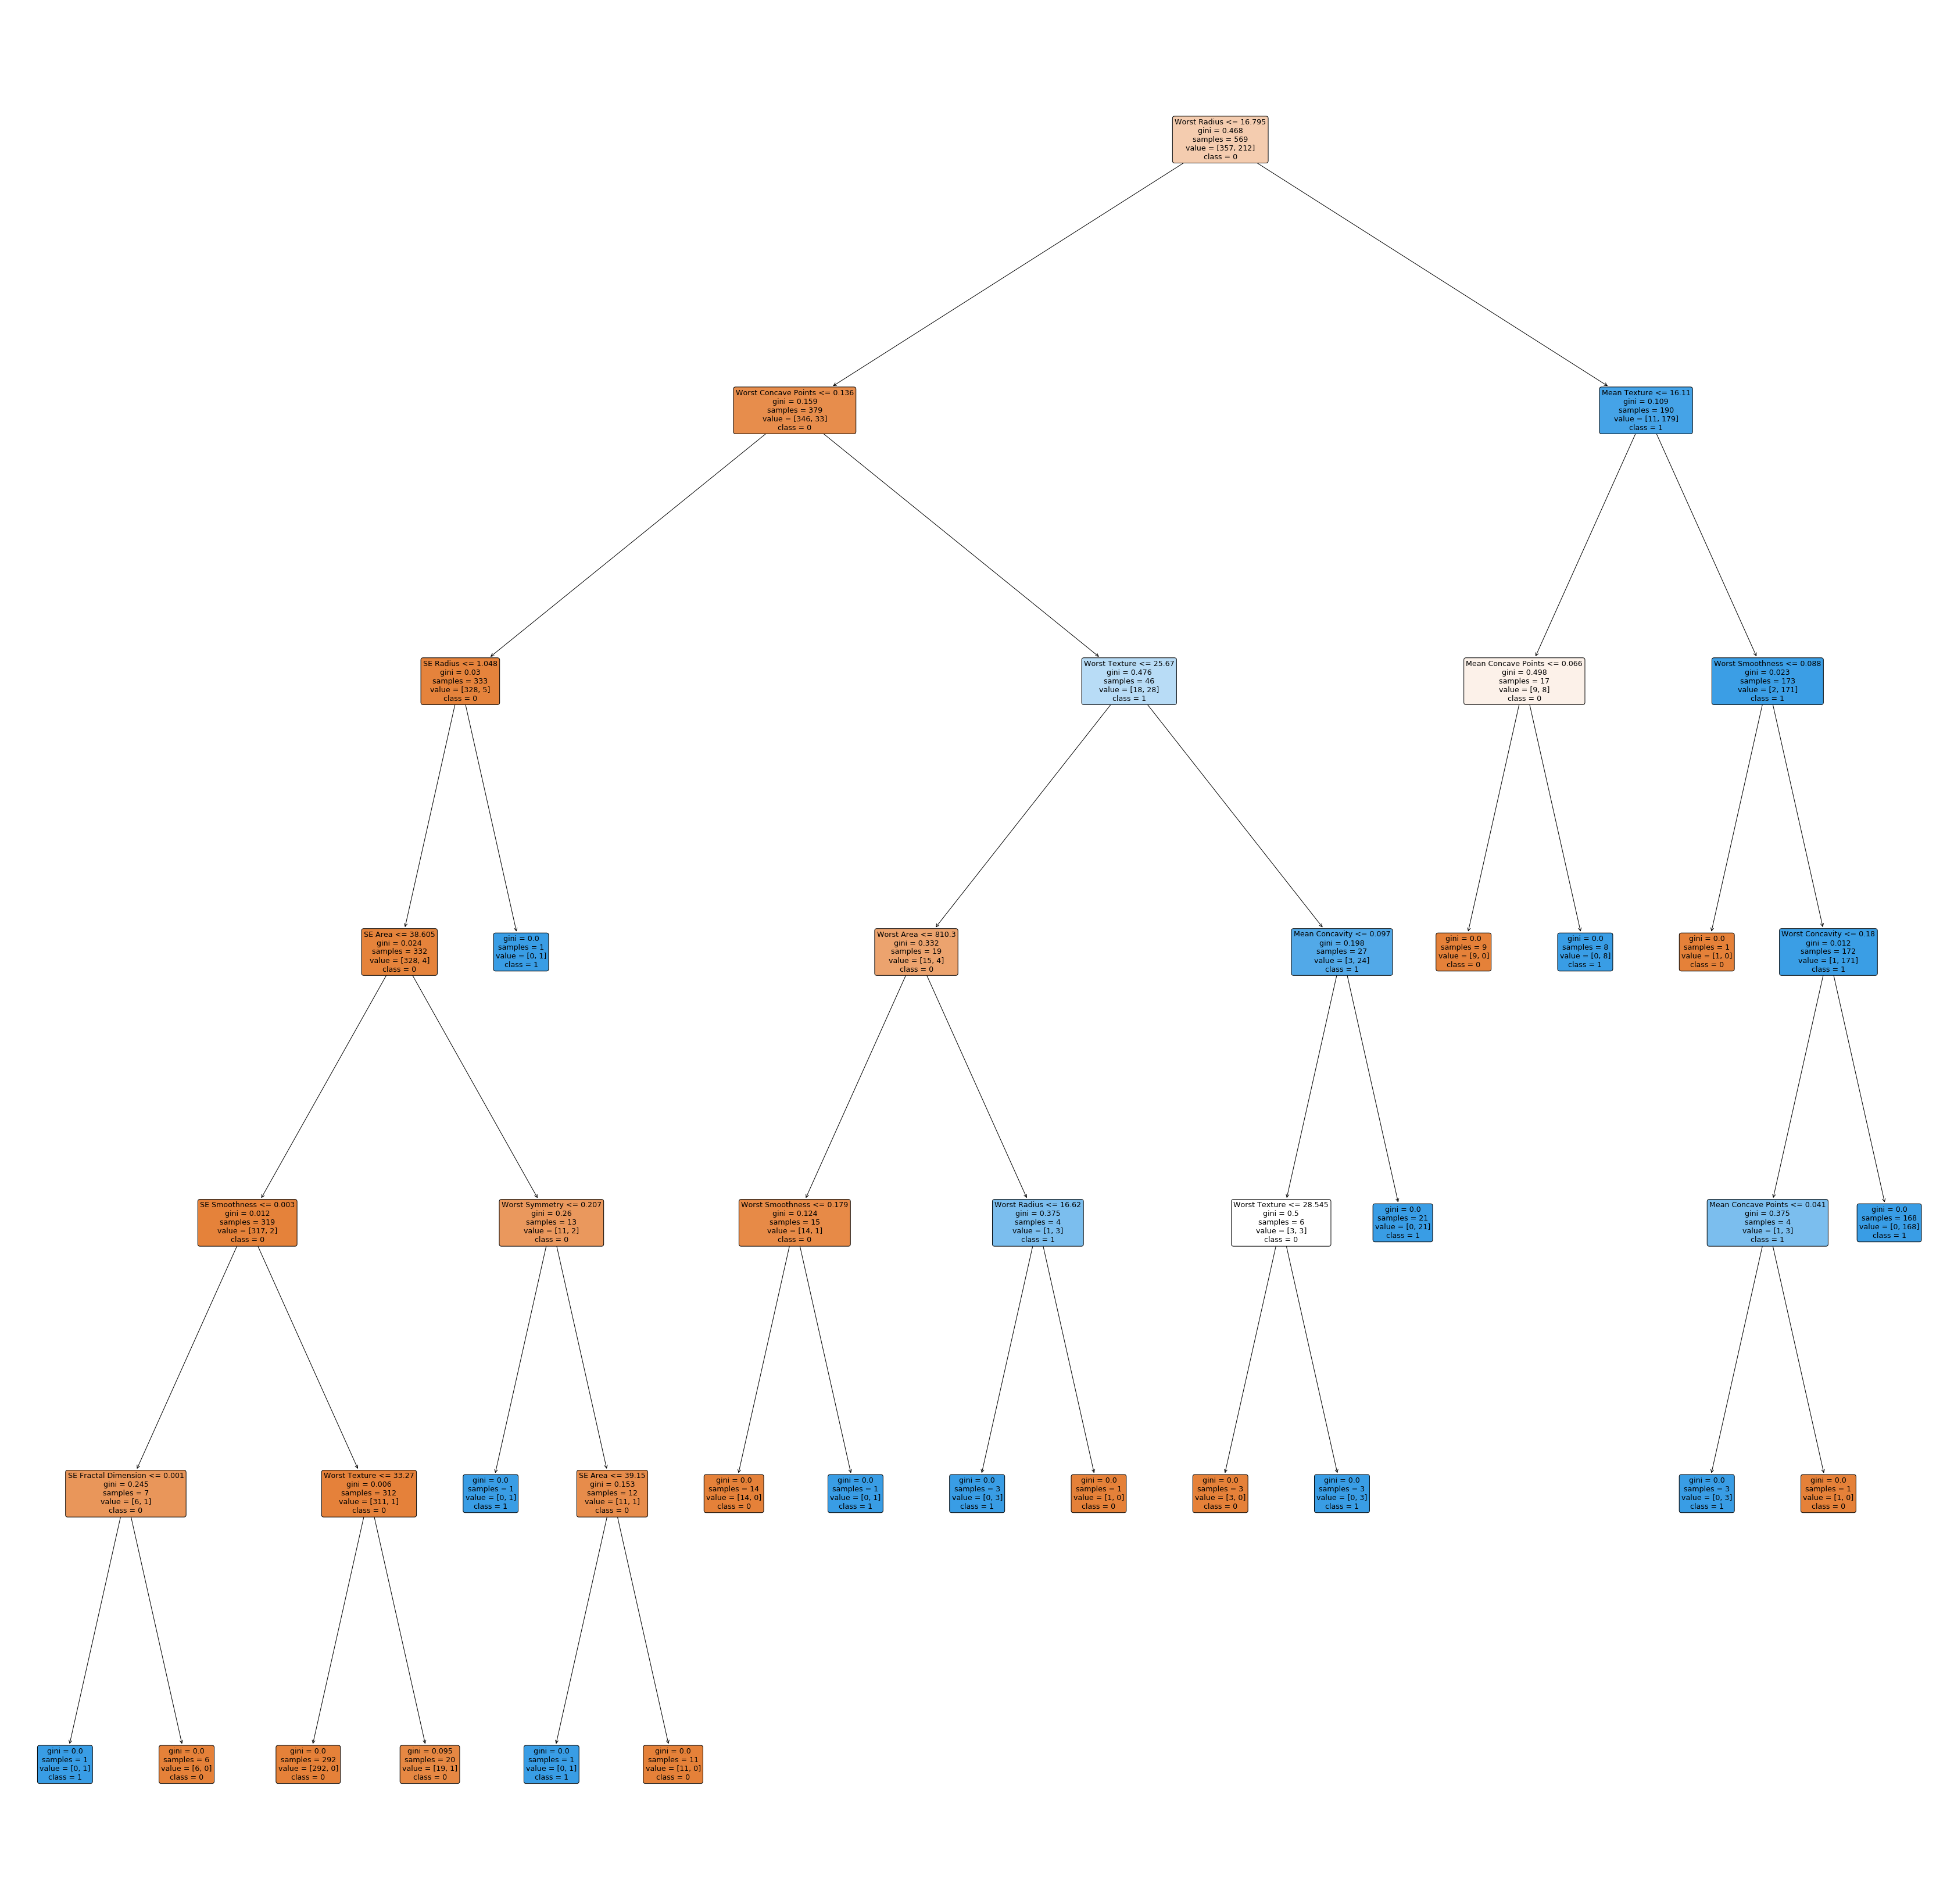

In [30]:

ax = plt.subplots(figsize=(60,60))
tree.plot_tree(clf1, 
               feature_names=X.columns, 
               class_names=["0", "1"],  
               rounded=True, 
               filled=True)

**I plot the feature importance to figure out which factors contribute the most to the model, I will explain in the later Exploration section**


In [22]:

feature_importance = clf1.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print(features_df)

                    Feature  Importance
20             Worst Radius    0.695594
27     Worst Concave Points    0.112928
21            Worst Texture    0.046077
1              Mean Texture    0.042485
16             SE Concavity    0.031841
24         Worst Smoothness    0.014405
23               Worst Area    0.011086
7       Mean Concave Points    0.008771
10                SE Radius    0.007316
5          Mean Compactness    0.006892
14            SE Smoothness    0.006642
19     SE Fractal Dimension    0.006444
22          Worst Perimeter    0.005639
13                  SE Area    0.002045
26          Worst Concavity    0.001836
25        Worst Compactness    0.000000
28           Worst Symmetry    0.000000
0               Mean Radius    0.000000
15           SE Compactness    0.000000
18              SE Symmetry    0.000000
17        SE Concave Points    0.000000
12             SE Perimeter    0.000000
11               SE Texture    0.000000
9    Mean Fractal Dimension    0.000000


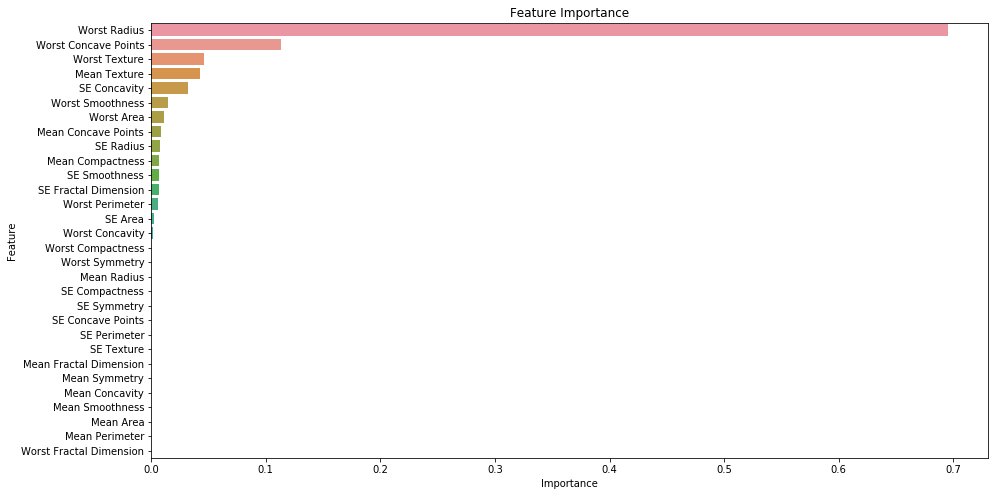

In [23]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
dt_predictions_test = clf1.predict(X_test)

# Compute confusion matrix using predictions from the test set and y_test
dt_confusion_test = confusion_matrix(y_test, dt_predictions_test)
dt_confusion_test

array([[73,  0],
       [ 1, 40]])

In [32]:



# Compute evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dt_accuracy = accuracy_score(y_test, dt_predictions_test)
dt_error = 1 - dt_accuracy
dt_precision = precision_score(y_test, dt_predictions_test, pos_label=1)
dt_recall = recall_score(y_test, dt_predictions_test, pos_label=1)
dt_f1 = f1_score(y_test, dt_predictions_test, pos_label=1)
dt_metrics = {
    "Accuracy": dt_accuracy,
    "Error": dt_error,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1-Score": dt_f1
}
print('Confusion Matrix')
print(dt_confusion_test)


dt_metrics


Confusion Matrix
[[73  0]
 [ 1 40]]


{'Accuracy': 0.9912280701754386,
 'Error': 0.00877192982456143,
 'Precision': 1.0,
 'Recall': 0.975609756097561,
 'F1-Score': 0.9876543209876543}

In [11]:



# Compute evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dt_accuracy = accuracy_score(y_test, dt_predictions_test)
dt_error = 1 - dt_accuracy
dt_precision = precision_score(y_test, dt_predictions_test, pos_label='M')
dt_recall = recall_score(y_test, dt_predictions_test, pos_label='M')
dt_f1 = f1_score(y_test, dt_predictions_test, pos_label='M')
dt_metrics = {
    "Accuracy": dt_accuracy,
    "Error": dt_error,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1-Score": dt_f1
}
print('Confusion Matrix')
print(dt_confusion_test)


dt_metrics


Confusion Matrix
[[73  0]
 [ 1 40]]


{'Accuracy': 0.9912280701754386,
 'Error': 0.00877192982456143,
 'Precision': 1.0,
 'Recall': 0.975609756097561,
 'F1-Score': 0.9876543209876543}

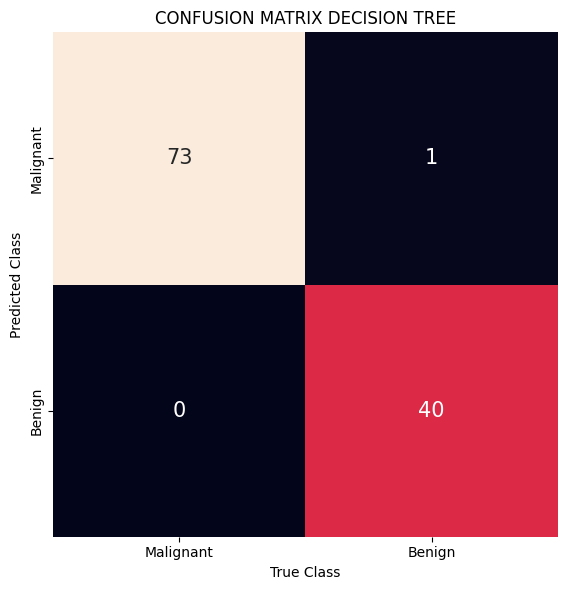

In [13]:
# Adjusting the heatmap to ensure numbers are more accurately centered in each cell

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dt_confusion_test.T, ax=ax, square=True, xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'], annot=True, fmt='d', cbar=False,
            annot_kws={"ha": 'center', "va": 'center', 'fontsize':'15'})
plt.title('CONFUSION MATRIX DECISION TREE')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.tight_layout()  # Adjust layout to fit elements
plt.show()

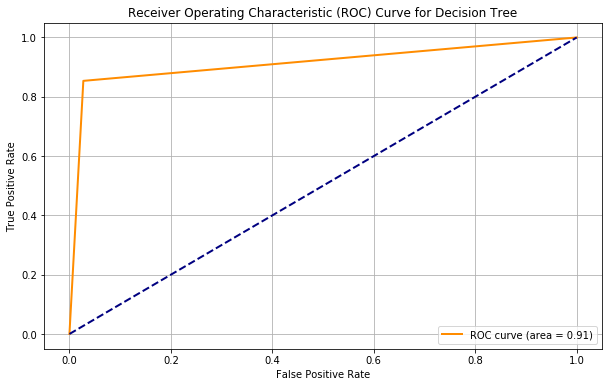

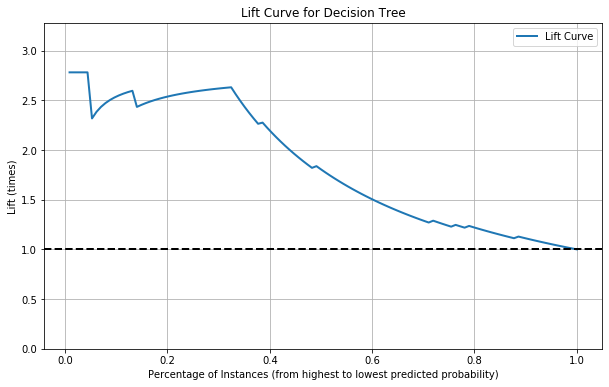

In [311]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc


dt_optimal = tree.DecisionTreeClassifier(max_depth =6)
dt_optimal.fit(X_train_normalized, y_train)

# Predict the probabilities for the positive class using the normalized test set
y_test_probdt = dt_optimal.predict_proba(X_test_normalized)[:, 1]

# Compute ROC curve and ROC area for SVM
fprdt, tprdt, _ = roc_curve(y_test, y_test_probdt)
roc_aucdt = auc(fprdt, tprdt)

# Plot the ROC curve for SVM
plt.figure(figsize=(10, 6))
plt.plot(fprdt, tprdt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucdt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

baseline_lift = y_test.mean()
# Compute the lift curve for the Decision Tree
sorted_indicesdt = np.argsort(y_test_probdt)[::-1]  
y_test_sorteddt = np.array(y_test)[sorted_indicesdt]

cumulative_positivesdt = np.cumsum(y_test_sorteddt)
cumulative_totaldt = np.arange(1, len(y_test) + 1)
liftdt = cumulative_positivesdt / cumulative_totaldt

# Adjusting the lift values for Decision Tree
adjusted_liftdt = liftdt / baseline_lift

# Plotting the lift curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(cumulative_totaldt / len(y_test), adjusted_liftdt, label='Lift Curve', lw=2)
plt.axhline(y=1, color='k', linestyle='--', lw=2)
plt.xlabel('Percentage of Instances (from highest to lowest predicted probability)')
plt.ylabel('Lift (times)')
plt.title('Lift Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.ylim(0, max(adjusted_liftdt) + 0.5)  # Adjusting y-axis limits for better visualization
plt.show()


**ROC Curve**

The curve is plotted with the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. TPR is also known as sensitivity, and FPR is one minus specificity.

The farther the curve is from this diagonal line (and closer to the top-left corner), the better the model's performance. The top-left corner indicates perfect classification.


**Based on the ROC curve generated from Decision Tree model, we can see that the true positive rate continuously has been predicted correctly, we can also easily that with less that top 20% identified of observation by the model, we can predict correctly up to 90% patient is having breast cancer, finally for the rest 80% of patients, we are able to predict the last 10% of maglignant breast cancer**

**Lift Curve**

The lift curve helps in determining how much better one can expect to do with the predictive model compared to random guessing.
In this case, for instance, if a doctor wants to target potential patient having breast cancer, a model with a high lift will ensure that the accuracy of prediction who are more likely to be maglinant.

**We can see this lift curve from Decision tree, let's say. with the top 10% having highest probability of malignant  we can expect to get at least 2.75 times as many malignant patient than if we were predicting randomly.**
**We can also see that for the top 20-30% as ranking by model, we can obtain 2.5 times in prediction of breast cancer better than random guessing**









In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, X, y, cv=10)
print(scores)

[0.93103448 0.89655172 0.9122807  0.85964912 0.96491228 0.87719298
 0.89473684 0.94642857 0.91071429 0.96428571]


### KNN model

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max normalization
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_val_normalized = minmax_scaler.transform(X_val)
X_test_normalized = minmax_scaler.transform(X_test)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

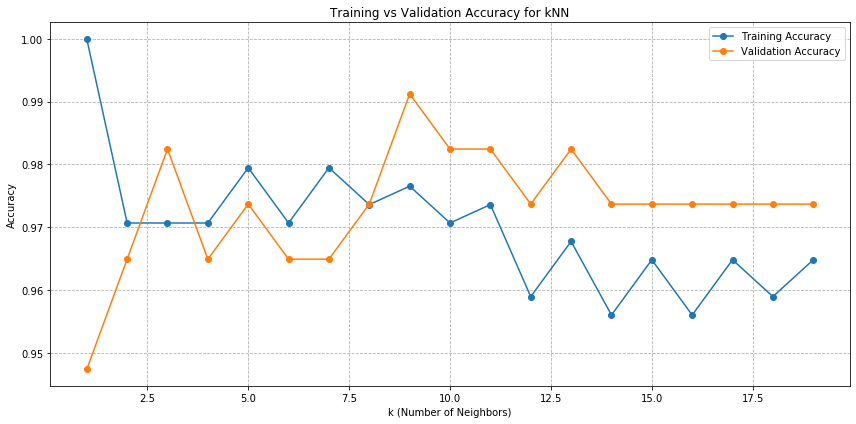

In [275]:
knn_train_accuracies = []
knn_val_accuracies = []

# Values for k (number of neighbors)
k_values = range(1, 20)

# Hyperparameter tuning
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # Train on the training set and record training accuracy
    knn.fit(X_train_normalized, y_train)
    train_accuracy = knn.score(X_train_normalized, y_train)
    knn_train_accuracies.append(train_accuracy)
    
    # Evaluate on the validation set and record validation accuracy
    val_accuracy = knn.score(X_val_normalized, y_val)
    knn_val_accuracies.append(val_accuracy)

# Plotting the training vs validation accuracies
plt.figure(figsize=(12, 6))
plt.plot(k_values, knn_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(k_values, knn_val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for kNN")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


**As we can see the graph, number of Neighbors at round 7-8 is the most most optimal one since k <7, the accuracy on the validaiton is even higher than accuracy on training dataset, which is underfitting. We also noticed that the k>8 lead to significant drop in performance on unseen data (validation) proves the model would suffer overfitting**


In [75]:
# Compute evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn_optimal = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn_optimal.fit(X_train_normalized, y_train)
knn_predictions_test= knn_optimal.predict(X_test_normalized)
knn_confusion_test = confusion_matrix(y_test, knn_predictions_test)


knn_accuracy = accuracy_score(y_test, knn_predictions_test)
knn_error = 1 - knn_accuracy
knn_precision = precision_score(y_test, knn_predictions_test, pos_label=1)
knn_recall = recall_score(y_test, knn_predictions_test, pos_label=1)
knn_f1 = f1_score(y_test, knn_predictions_test, pos_label=1)
knn_metrics = {
    "Accuracy": knn_accuracy,
    "Error": knn_error,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1-Score": knn_f1
}
print('Confusion Matrix')
print(knn_confusion_test)


knn_metrics



Confusion Matrix
[[73  0]
 [ 3 38]]


{'Accuracy': 0.9736842105263158,
 'Error': 0.02631578947368418,
 'Precision': 1.0,
 'Recall': 0.926829268292683,
 'F1-Score': 0.9620253164556963}

In [17]:
# Compute evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn_optimal = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn_optimal.fit(X_train_normalized, y_train)
knn_predictions_test= knn_optimal.predict(X_test_normalized)
knn_confusion_test = confusion_matrix(y_test, knn_predictions_test)


knn_accuracy = accuracy_score(y_test, knn_predictions_test)
knn_error = 1 - knn_accuracy
knn_precision = precision_score(y_test, knn_predictions_test, pos_label='M')
knn_recall = recall_score(y_test, knn_predictions_test, pos_label='M')
knn_f1 = f1_score(y_test, knn_predictions_test, pos_label='M')
knn_metrics = {
    "Accuracy": knn_accuracy,
    "Error": knn_error,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1-Score": knn_f1
}
print('Confusion Matrix')
print(knn_confusion_test)


knn_metrics



Confusion Matrix
[[73  0]
 [ 3 38]]


{'Accuracy': 0.9736842105263158,
 'Error': 0.02631578947368418,
 'Precision': 1.0,
 'Recall': 0.926829268292683,
 'F1-Score': 0.9620253164556963}

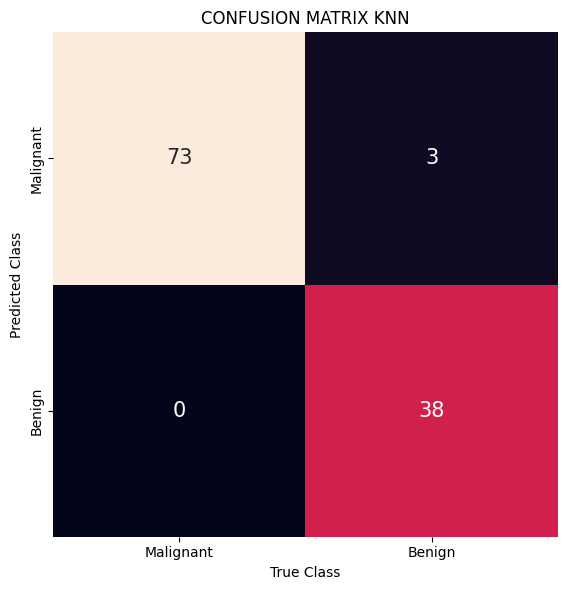

In [18]:
# Adjusting the heatmap to ensure numbers are more accurately centered in each cell

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(knn_confusion_test.T, ax=ax, square=True, xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'], annot=True, fmt='d', cbar=False,
            annot_kws={"ha": 'center', "va": 'center', 'fontsize':'15'})
plt.title('CONFUSION MATRIX KNN')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.tight_layout() 
plt.show()


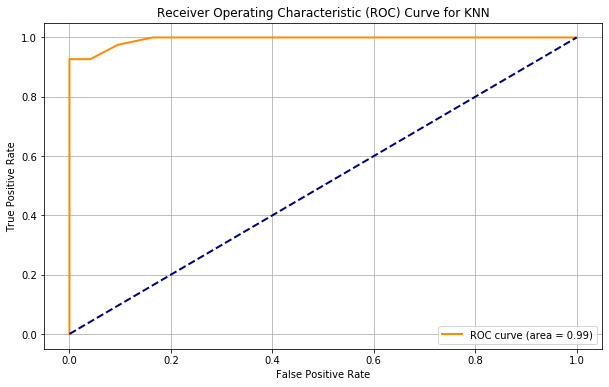

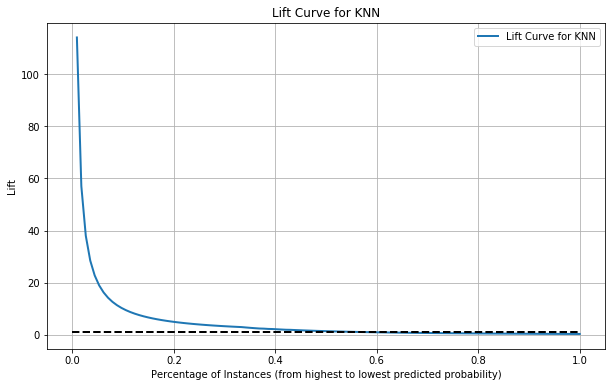

In [297]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc


knn_optimal = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn_optimal.fit(X_train_normalized, y_train)

# Predict the probabilities for the positive class using the normalized test set
y_test_probknn = knn_optimal.predict_proba(X_test_normalized)[:, 1]


fprknn, tprknn, _ = roc_curve(y_test, y_test_probknn)
roc_aucknn = auc(fprknn, tprknn)


plt.figure(figsize=(10, 6))
plt.plot(fprknn, tprknn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucknn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

sorted_indices_knn = np.argsort(y_test_probknn)[::-1]
y_test_sorted_knn = np.array(y_test)[sorted_indices_knn]

cumulative_positives_knn = np.cumsum(y_test_sorted_knn)
cumulative_total_knn = np.arange(1, len(y_test) + 1)

# Lift is the ratio of the model's performance to the performance of a random model
lift_knn = cumulative_positives_knn / cumulative_total_knn / (np.arange(len(y_test)) + 1) * len(y_test)

# Plotting the lift curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(cumulative_total_knn / len(y_test), lift_knn, label='Lift Curve for KNN', lw=2)
plt.plot([0, 1], [1, 1], 'k--', lw=2)
plt.xlabel('Percentage of Instances (from highest to lowest predicted probability)')
plt.ylabel('Lift')
plt.title('Lift Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()


**ROC Curve**

The ROC curve is a graphical representation of the performance of a binary classifier as its discrimination threshold is varied.
The curve is plotted with the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. TPR is also known as sensitivity, and FPR is one minus specificity.
The farther the curve is from this diagonal line (and closer to the top-left corner), the better the model's performance. The top-left corner indicates perfect classification.


**Based on the ROC curve generated from KNN model, we can see that the true positive rate continuously has been predicted correctly, with less that top 20% identified of observation by the model, we can predict correctly nearly 100% patient with breast cancer**

**Lift Curve**

The lift curve helps in determining how much better one can expect to do with the predictive model compared to random guessing.
In this case, for instance, if a doctor wants to target potential patient having breast cancer, a model with a high lift will ensure that the accuracy of prediction who are more likely to be maglinant.

**We can see this lift curve from KNN model, it is a bit strange  since it show super good performance of model than random guessing. With the top 10% having highest probability of malignant the lift ratio is always higher than 20 by  showing using this model has increased efficiency 20 times than random guessing** 




In [177]:
scores_knn = cross_val_score(knn_optimal, X, y, cv=10)
print(scores_knn)

[0.87931034 0.84482759 0.9122807  0.96491228 0.94736842 0.92982456
 0.96491228 0.94642857 0.92857143 0.92857143]


### Logistic Regression

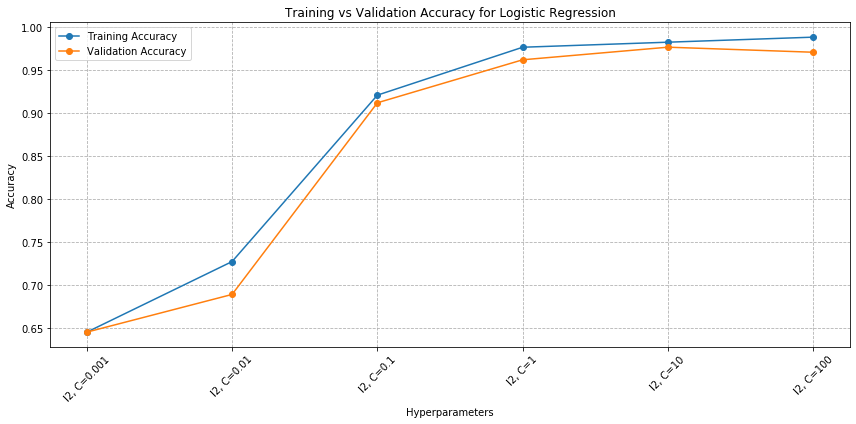

In [153]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg_penalties = ['l2']
logreg_C_values = [0.001, 0.01, 0.1, 1, 10, 100]
logreg_scores = {}
best_logreg_score = 0
best_logreg_params = None

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Store hyperparameters for plotting
hyperparameters = []

for penalty in logreg_penalties:
    for C_value in logreg_C_values:
        logreg = LogisticRegression(penalty=penalty, C=C_value, solver = 'newton-cg', max_iter=5000, random_state=42)
        
        # Train on the entire training set and record training accuracy
        logreg.fit(X_train_normalized, y_train)
        train_accuracy = logreg.score(X_train_normalized, y_train)
        train_accuracies.append(train_accuracy)
        
        # Use cross-validation to get validation accuracy
        val_accuracy = logreg.score(X_val_normalized, y_val)
        val_accuracies.append(val_accuracy)
        
        # Store hyperparameters
        hyperparameters.append(f"{penalty}, C={C_value}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hyperparameters, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(hyperparameters, val_accuracies, label="Validation Accuracy", marker='o')
plt.xticks(rotation=45)
plt.xlabel("Hyperparameters")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Logistic Regression")
plt.legend()
plt.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()


**In the logistic regression in this case we have only 2 classes in the target variable so that I do not apply the multi_class = 'multinomial'. Since the solver = 'newton-cg' only support for the penalty = 'l2' so that I applied different hyperparameter for C value (the inverse of regularization strength) to pick the most optimal model.**

**It is worth noting that at C > 10 performance of training dataset increase while the decrease happened in validation, so at C>10 model possibly suffer overfitting and in the scenario of C < 10 the performance of model on validation has not reached the peak which show underfitting**

In [176]:

# Train the Logistic Regression model with the best parameters

logreg_best = LogisticRegression(penalty='l2', C=10, solver='newton-cg', max_iter=5000, random_state=42)
logreg_best.fit(X_train_normalized, y_train)

# Predict on the test set using the trained model
logreg_best_predictions = logreg_best.predict(X_test_normalized)

# Compute confusion matrix and other metrics for the best Logistic Regression model
logreg_best_confusion = confusion_matrix(y_test, logreg_best_predictions)
logreg_best_accuracy = accuracy_score(y_test, logreg_best_predictions)
logreg_best_error = 1 - logreg_best_accuracy
logreg_best_precision = precision_score(y_test, logreg_best_predictions, pos_label=1)
logreg_best_recall = recall_score(y_test, logreg_best_predictions, pos_label=1)
logreg_best_f1 = f1_score(y_test, logreg_best_predictions, pos_label=1)

logreg_best_metrics = {
    "Accuracy": logreg_best_accuracy,
    "Error": logreg_best_error,
    "Precision": logreg_best_precision,
    "Recall": logreg_best_recall,
    "F1-Score": logreg_best_f1
}

print (logreg_best_confusion)
logreg_best_metrics


[[73  0]
 [ 3 38]]


{'Accuracy': 0.9736842105263158,
 'Error': 0.02631578947368418,
 'Precision': 1.0,
 'Recall': 0.926829268292683,
 'F1-Score': 0.9620253164556963}

In [20]:

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model with the best parameters

logreg_best = LogisticRegression(penalty='l2', C=10, solver='newton-cg', max_iter=5000, random_state=42)
logreg_best.fit(X_train_normalized, y_train)

# Predict on the test set using the trained model
logreg_best_predictions = logreg_best.predict(X_test_normalized)

# Compute confusion matrix and other metrics for the best Logistic Regression model
logreg_best_confusion = confusion_matrix(y_test, logreg_best_predictions)
logreg_best_accuracy = accuracy_score(y_test, logreg_best_predictions)
logreg_best_error = 1 - logreg_best_accuracy
logreg_best_precision = precision_score(y_test, logreg_best_predictions, pos_label='M')
logreg_best_recall = recall_score(y_test, logreg_best_predictions, pos_label='M')
logreg_best_f1 = f1_score(y_test, logreg_best_predictions, pos_label='M')

logreg_best_metrics = {
    "Accuracy": logreg_best_accuracy,
    "Error": logreg_best_error,
    "Precision": logreg_best_precision,
    "Recall": logreg_best_recall,
    "F1-Score": logreg_best_f1
}

print (logreg_best_confusion)
logreg_best_metrics


[[73  0]
 [ 3 38]]


{'Accuracy': 0.9736842105263158,
 'Error': 0.02631578947368418,
 'Precision': 1.0,
 'Recall': 0.926829268292683,
 'F1-Score': 0.9620253164556963}

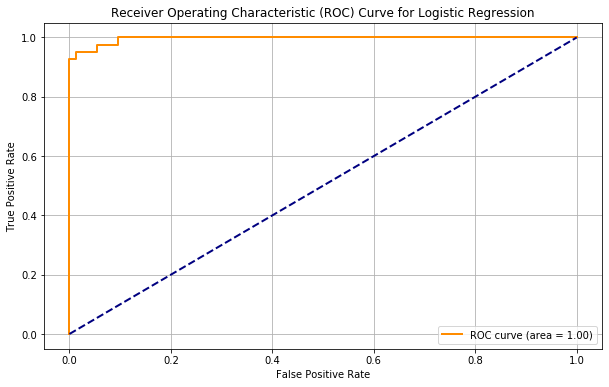

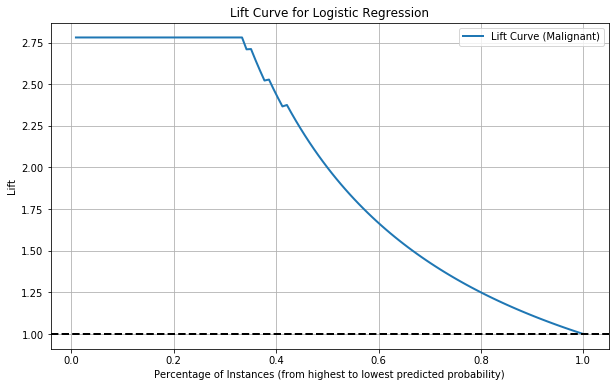

In [293]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

logreg_best = LogisticRegression(penalty='l2', C=10, solver='newton-cg', max_iter=5000, random_state=42)
logreg_best.fit(X_train_normalized, y_train)

# Predict the probabilities for the positive class using the normalized test set
y_test_prob_log = logreg_best.predict_proba(X_test_normalized)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_test_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)


plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute the lift curve for log
sorted_indices_log = np.argsort(y_test_prob_log)[::-1]  
y_test_sorted_log = np.array(y_test)[sorted_indices_log]

cumulative_positives_log = np.cumsum(y_test_sorted_log)
cumulative_total_log = np.arange(1, len(y_test) + 1)
lift_log = cumulative_positives_log / cumulative_total_log

# Compute the lift curve for log for the positive class
sorted_indices_log = np.argsort(y_test_prob_log)[::-1]  
y_test_sorted_log = np.array(y_test)[sorted_indices_log]

cumulative_positives_log = np.cumsum(y_test_sorted_log)
cumulative_total_log = np.arange(1, len(y_test) + 1)
lift_log_positive = cumulative_positives_log / (cumulative_total_log * np.mean(y_test))

# Compute the lift curve for the negative class
cumulative_negatives_log = np.cumsum(1 - y_test_sorted_log)
lift_log_negative = cumulative_negatives_log / (cumulative_total_log * (1 - np.mean(y_test)))

# Plotting the lift curve for both positive and negative classes
plt.figure(figsize=(10, 6))
plt.plot(cumulative_total_log / len(y_test), lift_log_positive, label='Lift Curve (Malignant)', lw=2)

plt.axhline(y=1, color='k', linestyle='--', lw=2)
plt.xlabel('Percentage of Instances (from highest to lowest predicted probability)')
plt.ylabel('Lift')
plt.title('Lift Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()



**ROC Curve**

The curve is plotted with the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. TPR is also known as sensitivity, and FPR is one minus specificity.

The farther the curve is from this diagonal line (and closer to the top-left corner), the better the model's performance. The top-left corner indicates perfect classification.


**Based on the ROC curve generated from Logistic Regression model, we can see that the true positive rate continuously has been predicted correctly, we can also easily that with less that top 10% identified of observation by the model, we can predict correctly up to 100% patient is having breast cancer**

**Lift Curve**

The lift curve helps in determining how much better one can expect to do with the predictive model compared to random guessing.
In this case, for instance, if a doctor wants to target potential patient having breast cancer, a model with a high lift will ensure that the accuracy of prediction who are more likely to be maglinant.

**We can see this lift curve from  Logistic regression, let's say. with the top 30% having highest probability of malignant  we can expect to get 2.75 times as many malignant patient than if we were predicting randomly.**








In [179]:
scores_log = cross_val_score(logreg_best, X, y, cv=10)
print(scores_log)

[0.98275862 0.9137931  0.92982456 0.94736842 0.96491228 1.
 0.94736842 0.94642857 0.96428571 0.96428571]


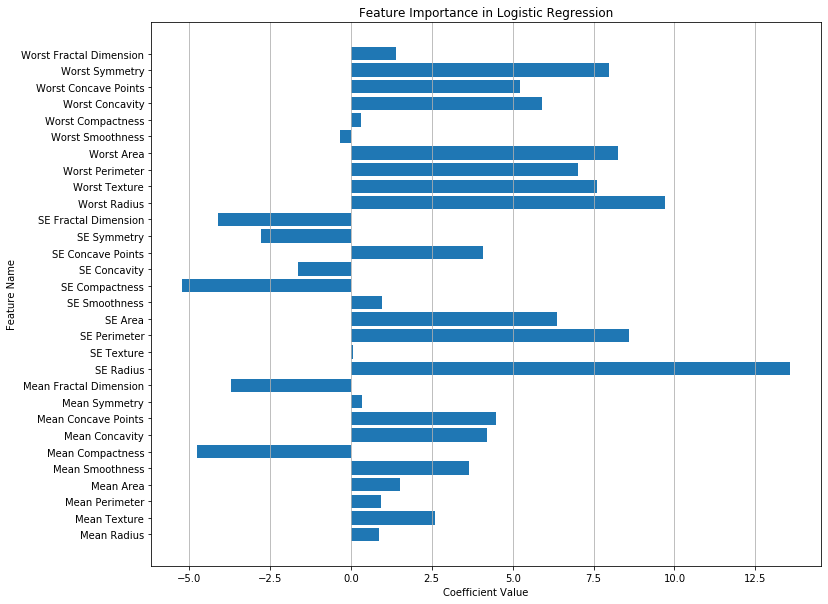

In [159]:
coefficients = logreg_best.coef_[0]
plt.figure(figsize=(12, 10))
plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Logistic Regression')
plt.grid(axis='x')
plt.show()


### Support Vector Machine SVM model

Average difference of 0.002450 with std. dev. of 0.001797.


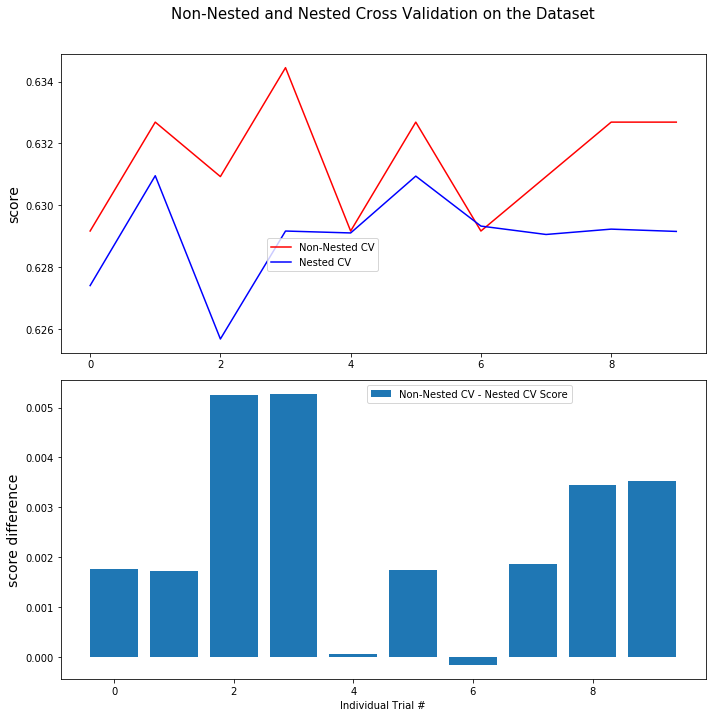

In [17]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1, 1]}

svm = SVC(kernel="rbf")
# Reduce the number of random trials
NUM_TRIALS = 10  # Reduced from 10 to 3 for faster computation

# Arrays to store scores for nested and non-nested cross-validation
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Define cross-validation techniques for the inner and outer loops
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

# Calculate score differences between non-nested and nested CV
score_difference = non_nested_scores - nested_scores

# Display the results
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure(figsize=(10, 10))
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on the Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf_svm.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_svm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_svm.cv_results_['mean_test_score']
    stds = clf_svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_svm.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.905 (+/-0.048) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.061) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.042) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.057) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.042) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.916 (+/-0.071) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.042) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.915 (+/-0.074) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.969 (+/-0.043) for {'C': 1, 'kernel': 'linear'}
0.954 (+/-0.055) for {'C': 10, 'kernel': 'linear'}
0.957 (+/-0.061) for {'C': 100, 'kernel': 'linear'}
0.957 (+/-0.061) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full eva

In [11]:
from sklearn.metrics import confusion_matrix

# Assuming you have already defined and normalized X_train, y_train, X_test, and y_test

# Fit the model
svm_best.fit(X_train_normalized, y_train)

# Predict the labels for the test set
y_pred_svm = svm_best.predict(X_test_normalized)

# Create confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm


array([[73,  0],
       [ 3, 38]])

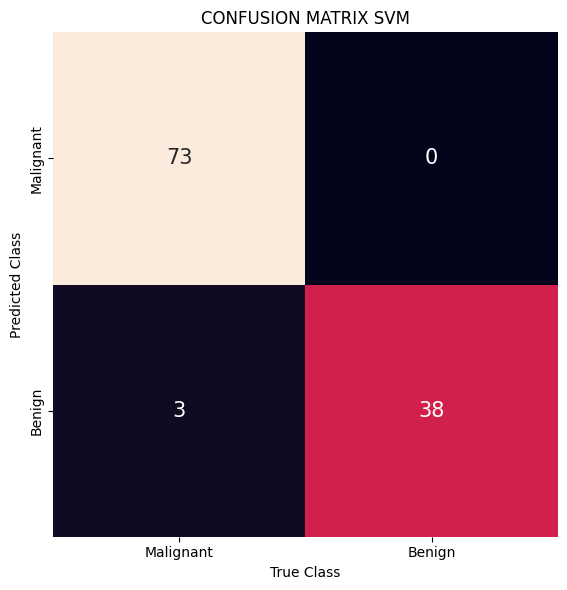

In [12]:
import seaborn as sns

# Create a confusion matrix heatmap for the SVM model
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, ax=ax, square=True, xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'], annot=True, fmt='d', cbar=False,
            annot_kws={"ha": 'center', "va": 'center', 'fontsize':'15'})
plt.title('CONFUSION MATRIX SVM')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.tight_layout()
plt.show()


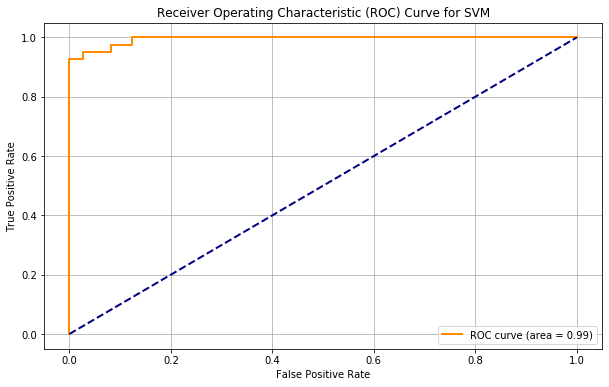

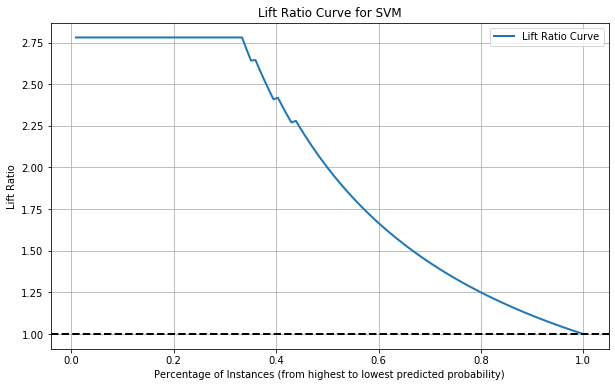

In [313]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

svm_best = SVC(kernel='linear', C=1, probability=True)
svm_best.fit(X_train_normalized, y_train)

# Predict the probabilities for the positive class using the normalized test set
y_test_prob_svm = svm_best.predict_proba(X_test_normalized)[:, 1]

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_test_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Compute the lift curve for SVM
sorted_indices_svm = np.argsort(y_test_prob_svm)[::-1]  
y_test_sorted_svm = np.array(y_test)[sorted_indices_svm]

cumulative_positives_svm = np.cumsum(y_test_sorted_svm)
cumulative_total_svm = np.arange(1, len(y_test) + 1)
lift_svm = cumulative_positives_svm / cumulative_total_svm

# Calculate the baseline (overall proportion of positive instances)
baseline = np.sum(y_test) / len(y_test)

# Calculate the lift ratio
lift_ratio_svm = lift_svm / baseline

# Plotting the lift ratio curve for SVM
plt.figure(figsize=(10, 6))
plt.plot(cumulative_total_svm / len(y_test), lift_ratio_svm, label='Lift Ratio Curve', lw=2)
plt.axhline(y=1, color='k', linestyle='--', lw=2)  # Draw a line at lift ratio of 1
plt.xlabel('Percentage of Instances (from highest to lowest predicted probability)')
plt.ylabel('Lift Ratio')
plt.title('Lift Ratio Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()


**ROC Curve**

The curve is plotted with the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. TPR is also known as sensitivity, and FPR is one minus specificity.

The farther the curve is from this diagonal line (and closer to the top-left corner), the better the model's performance. The top-left corner indicates perfect classification.


**Based on the ROC curve generated from SVM  model, we can see that the true positive rate continuously has been predicted correctly, we can also easily that with less that top 10% identified of observation by the model, we can predict correctly up to 90% patient is having breast cancer, we. model can capture 100% with the top 20% of observation having highest probability of malignant**

**Lift Curve**

The lift curve helps in determining how much better one can expect to do with the predictive model compared to random guessing.
In this case, for instance, if a doctor wants to target potential patient having breast cancer, a model with a high lift will ensure that the accuracy of prediction who are more likely to be maglinant.

**We can see this lift curve from SVM is relatively similar to Logistic regression but it has slight different, for the top 30%, model can always predict exactly 100% patient having breast cancer. Let's say. with the top 10% having highest probability of malignant the lift ratio could be upto 100%/10% = 10  showing using this model has increased efficiency 10 times than random guessing** 









**Overview of predictive modeling process**

The process is nearly similar from Homework1, I also build SVM for this classificaiton and also add ROC and lift curve discussion into the conclusion. 


1. Data Loading and Pre-processing:
The Breast Cancer dataset was loaded into a pandas DataFrame. I then extracted the features and the target variable. The features Ire normalized using the Min-Max scaling method to ensure that all of them have similar scales, which is crucial for distance-based algorithms like kNN.

2. Data Splitting:
The dataset was split into training, validation, and testing sets in a 60-20-20 ratio. This allows me to train the models on the training data, fine-tune hyperparameters using the validation data, and finally evaluate the model's performance on the test data.

3. Model Building and Evaluation:
I built and evaluated models:Decision tree, KNN and Logistic regression in order to find the most optimal predictive model to predict the breast cancer based on given dataset

3.1. Hyperparameter selection and model selection:
In each model, I tried with different hyperparameter: maxdepth in decision tree, k value in the kNN model, and c value in Logistic regression, then finalized the optimal hyperparameter to get highest performance on traning data but ensure not commmit overfitting by comparing with performance on validation dataset. After that, I would like to check the robust of the model by using cross-validation to check whether my model work well on the unseen data. 

3.2. Evaluation 
After hyperparameter finalization based on best performance on validation and not commit overfitting, I use different performance metric to evaluate the model, accuracy, precision, recall and f-measure on testing data in order to compare models together. I also plotted ROC and Lift curve to see how well the model performance compared with random guessing and how we can benefit from that by selecting the top patients having highest probabiltiy of malignant. 






**Explorations**
 
In general, based on the accuracy and F1 score among 3 models, decision tree give us the most optimal predictive model with the performance at 99%, even after we comparing with SVM model. 


In this scenario, a missed diagnosis in breast cancer may cause more serious consequence, a high recall means that there are fewer false negatives. Thus, I would like to use Recall as the main performance matrix, decision tree perform quite well with the Recall > 95% while Recall of Logistic regression and kNN are approximately 92%.

In addition, we also look at the feature importance in Decision tree and coefficient in Logistic regression to see which factors are the most important to the prediction of breast cancer. 
- Apparently, **Worst Radius**,**Worst Concave Point**  appears in the top 5 important factors in the model, which can help medical professionals good implication to predict the patient. 
- Moreover, based on the above decision tree we can easily notice that if **Worst Radius <= 16.79** and **Worst Concave Point <= 0.136** , **SE Radius < 1.048** has more probability to be maglinant
- We are also able to seperate 2 groups of factor  having different effect on breast cancer based on the coeficient of logistic model almost factor show positive relationship the more or higher they are, the more probability of breast cancer maglinant, however, it is opposite to the groups of factor of **Compactness** and **Fractal Dimension**